In [ ]:
from lib import *

height, weight, gender = load_data(sub_sample=True)
X, mu_X, sigma_X = standarizer(height)
y, X_ = build_model_data(X, weight)

In [ ]:
import numpy as np

def loss_function(X_, y, w, option=1):
  """
    Args:
      X_: matrix numpy de la forma (N,2)
      y: vector numpy de la forma (N,)
      w: vector de la forma (2,)
      option: 1 for mse
              0 for mae

    Return:
      El valor de la perdida correspondiente a el parametros de entrada w
  """
  N = len(y)
  F = np.dot(X_,w)
  if option == 0:
    loss = (1/(N))*np.sum(np.abs(y-F))
    return loss
  elif option == 1:
    loss = (1/(2*N))*np.sum((y-F)**2)
    return loss


In [ ]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([0, 1])

loss_function(xx, yy, ww, 0)

0.0

(a) ¿Qué representa cada columna de X_?

La primera columna representa un vector de unos y la segunda columna el valor de altura estandarizada.

(B) ¿Qué representa cada fila de X_?

Son los datos de 1 y altura, dónde cada fila contiene una altura diferente.

(c) ¿Por qué tenemos unos en X_?

La razón para la columnas de unos, es para que se puede realizar la operación F = X_ * w y obtener como resultado F = wo + w1*xn1.

(d) Si tenemos las alturas y pesos de 3 personas, ¿cuál será ıa el tamaño de y y X_? ¿Qué representará ıa X_32?

y será de tamaño 3 con dimensiones (3,1), y X_32, representará la altura de la persona 3.

(e) En lib.py, se ha proporcionado código para formar arrays para y y X_. Revisa el código y asegúrate de entender cómo están construidos.

El código lib.py, contiene 3 funciones. La función load_data(sub_sample), carga los datos de la altura, peso y genero del path previamente definido al archivo altura_peso.csv usando numpy. Luego convierte la altura de pulgadas metros y el peso de libras a kilogramos y se hace un subsample, disminuyendo la cantidad de datos en caso la entrada sea True, si no, los datos quedan iguales. Por último se retornan los valores de las alturas, pesos y generos.

La función standarizer(), recibe una entrada de datos, en este caso la altura, y calcula la media y la desviación estandar, para luego usar la formula de la estandarización. Retorna los datos estandarizado, la media y la desviación estandar.


La función build_model_data(height, weight), simplemente le agrega una columna de unos a la altura y retorna la altura y los pesos.

(f) Verifica si los tamaños de las variables tienen sentido (usa la función shape).


In [ ]:
print(np.shape(X_), np.shape(y))

(200, 2) (200,)


Los datos tienen sentidos. Cuentan con 10000 datos de la altura y pesos de diferentes personas y X_ contiene una columnas de unos y otra de alturas estandarizadas por lo que la dimensiones se deberian se (10000,2).

# 2. Grid Search

In [ ]:
import numpy as np

def grid_search(X_, y, grid_w0, grid_w1, option):
    """
    Este algoritmo realiza la busqueda creando una cuadricula
    Args:
      X_ : numpy de la forma = (N,2)
      y  : numpy de forma =  (N,)
      grid_w0: numpy de la forma = (num_pts_w0,) .Array 1D que contiene num_pts_w0 valores del parametro w0 a ser probados en la cuadricula
      grid_w1: numpy de la forma = (num_pts_w1,) .Array 1D que contiene num_pts_w1 valores del parametro w1 a ser probados en la cuadricula
      option: scalar value = 1 para MSE y 0 para MAE
    Return:
      losses: numpy de la forma = (num_pts_w0, num_pts_w1). Array 2D que contiene los valores de la funcion de perdidad para cada una de las
              combinaciones de w0 y w1
    """

    losses_grid = np.zeros((len(grid_w0), len(grid_w1)))
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            # Crear un array w con w0 y w1
            w = np.array([w0,w1])
            # Calcula la pérdida según la opción especificada (MSE o MAE)
            w = np.reshape(w,(len(w),1))
            y = np.reshape(y,(len(y),1))
            loss = loss_function(X_,y,w, option = option)
            # Almacena la pérdida en la posición correspondiente de la cuadrícula
            losses_grid[i, j] = loss
    return losses_grid


In [ ]:
def gen_w(start, stop, n_intervals):
  """ Generamos la Grilla """
  grid_w0 = np.linspace(start[0], stop[0], n_intervals)
  grid_w1 = np.linspace(start[1], stop[1], n_intervals)
  return grid_w0, grid_w1

def get_best_param(w0, w1, losses_grid):
  """ Obtenemos los mejores w* a partir del resultados obtenidos con la función de perdida en grid search
  """
  min_row, min_col = np.unravel_index(losses_grid.argmin(), losses_grid.shape)
  return losses_grid[min_row, min_col], w0[min_row], w1[min_col]

In [ ]:
import datetime

# Emepzamos generando la malla
start = [-100, -150]
stop = [200, 150]
n_intervals = 10

grid_w0, grid_w1 = gen_w(start, stop, n_intervals)

# iniciamos la busqueda en la malla
start_time = datetime.datetime.now()
grid_losses = grid_search(X_,y, grid_w0, grid_w1, 1)

# Escogemos la mejor combinación
loss_min, w0_best, w1_best = get_best_param(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print(f"Grid Search: loss* = {loss_min}, w0* = {w0_best}, w1* = {w1_best}, execution time = {execution_time} seconds")

Grid Search: loss* = 40.30342362683201, w0* = 66.66666666666669, w1* = 16.666666666666686, execution time = 0.004003 seconds


(a) ¿Te parece una buena estimación? ¿Por qué? ¿Cúal es el problema? ¿Por qué el gráfico MSE no es suave? Repite el ejercicio anterior cambiando el espaciado de la cuadrícula a 10 en lugar de 50. Compara el nuevo ajuste con el anterior.

- Me parece una buena estimacion puesto que obtenemos un error pequeño y una buena precision a la hora de predecir los datos, el unico problema seria que el tiempo de compilacion aumentaria en gran medida si se quiere aumentar mas la precision, que el grafico no sea suave se debe a que no se esta tomando en si valores continuos de una funcion sino puntos discretos en nuestro espacio, si se ussan 10 puntos en lugar de 50, se puede observar que el tiempo de ejecucion se reduce en gran medida y al haber menos intervalos se alcanzan a apreciar mucho mas los tramos en la grafica.

(b) Discute con tus compañeros:- Para obtener un ajuste preciso, ¿necesitas una cuadrícula gruesa o una cuadrícula fina?- Prueba con distintos valores de espaciado de cuadrícula. ¿Qué observas?- ¿Cómo afecta el aumento del número de valores al coste computacional? ¿Es rápido o lento tu código?

- Para mayor precision se necesitaria una cuadricula fina, pues de esta manera podremos alcanzar a estar mas cerca del minimo global, aumentar la cantidad cantidad de invervalos mejora la precision pero hasta cierto punto, llega un momento en el que aumentar el numero de intervalos no muestra ninguna ventaja significativa, aumentar el numero de intervalos tiene un alto coste computacional ya que al duplicar la cantidad de intervalos estamos realmente cuadruplicando la cantidad de puntos discretos lo que da como resultado un codigo lento y con poca mejora respecto a codigos con un numero de intervalos mas bajo.

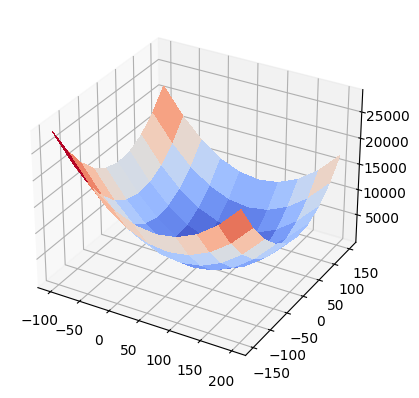

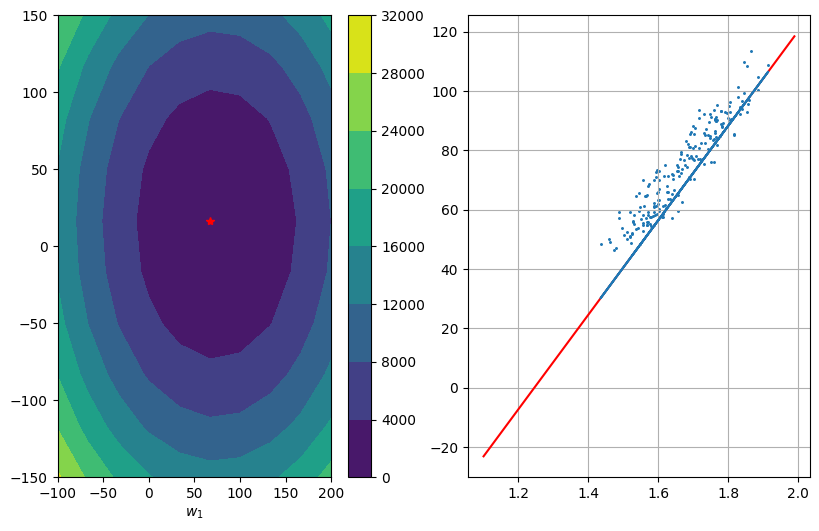

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

def predictions(w0, w1, mu, sigma):
  """ Creemos el modelo de la regresion lineal f(x)"""
  x = np.arange(1.1, 2, 0.01)
  x_normalized = (x - mu)/sigma
  f = w0 + w1*x_normalized
  return x, f

# Grafiquemos los resultados 3D
w0, w1 = np.meshgrid(grid_w0, grid_w1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, grid_losses, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig = plt.figure()

# plt contour
ax1 = fig.add_subplot(1,3,1)
contour = ax1.contourf(w0, w1, grid_losses.T)
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r"$w_0$")
ax1.set_xlabel(r"$w_1$")
# ubiacion al minimo  - star
ax1.plot(w0_best, w1_best, marker = '*', color="r")

# plt model
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( height, weight, marker='.', s=5)
ax2.grid()

x, f = predictions(w0_best, w1_best, mu_X, sigma_X)   # Modelos f(x) = w0 +w1*x
ax2 = fig.get_axes()[2]
ax2.plot(x, f, color='r')
ax2.plot(height, w0_best + w1_best*X)                 # Desde los datos
fig.set_size_inches(15, 6)



# 3. Gradient Descent

In [ ]:
def gd(X_, w, y):
  """ Calculo del gradiente en w
  Args:
    X_: numpy de la forma (N,2)
    w : numpy d ela forma (2,) . Vector de parametros del modelos
    y : numpy de la forma (N,)
  Return
    Un vector numpy de la forma (2,) (misma forma que w), que tiene el gradiente de la funcion de perdida en w
  """
  N = len(y)
  F = np.dot(X_,w) #(10000,2)*(2,1) = (10000,1)
  error = (y-F) #(10000,1)
  gradient = -(1/N)*np.dot(X_.T,error) #(10000,2).T*(10000,1) = (2,1)
  return gradient,error

(a) Implementa una función que calcule los gradientes. Implementa la función de cuaderno calcular gd(X_, w, y) utilizando la ecuación (1). Comprueba que la función devuelve los valores correctos. Primero, calcula manualmente los gradientes para valores de y, $\bar{X}$, y w y compáralos con la salida de gd(X_, w, y).

In [ ]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([1, 1])
gd(xx, ww, yy)

(array([1. , 1.5]), array([-1, -1]))

In [ ]:
def gd_algorithm(X_, y, w_initial, max_iters, gamma):
  """
    Algoritmo GD
    Args:
      X_: numpy de la forma (N,2)
      y : numpy de la forma (N,)
      w_inicial: numpy de la forma (2,). Inicializacion del modelo
      max_iters: un escalar indicando el maximo numero de iteraciones
      gamma: escalar indicando el paso o learning rate

    Returns:
      losses: lista de longuitud max_iters con loas valores de las perdidad para cada iteracion de GD
      wt: una lista de longuitud max_iters con los parametros del modelo como numpy de la forma (2,) apra cada iteracion
  """
  wt = [w_initial]
  losses = []
  w = w_initial
  y = np.reshape(y,(len(y),1))
  w = np.reshape(w,(len(w),1))

  for n_iter in range(max_iters):
    # Agrega el codigo apara calcular el gradiente y loss
    # ...
    loss = loss_function(X_,y,w,1)
    gradiente, error = gd(X_,w,y)

    # Agrega el coldigo para actualizar w
    # ...
    w = w - gamma*gradiente

    # Guardemos w y loss
    wt.append(w)
    losses.append(loss)
    print(" GD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format( i=n_iter,
          ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))

  return losses, wt

In [ ]:
max_iters = 50
gamma = 0.7

w_initial = np.array([0, 0])
# Iniciamos
start_time = datetime.datetime.now()
gd_l, gd_w = gd_algorithm(X_, y, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Vamos los resultados
ex_time = (end_time - start_time).total_seconds()
print(f"Tiempo de ejecucion del Algortimo GD: {ex_time:.3f} segundos")

 GD iter 0/49: loss=2829.2722244384163, w0=[51.54259072], w1=[10.13299341]
 GD iter 1/49: loss=267.05002587794155, w0=[67.00536794], w1=[13.17289144]
 GD iter 2/49: loss=36.45002800750027, w0=[71.6442011], w1=[14.08486084]
 GD iter 3/49: loss=15.696028199160635, w0=[73.03585105], w1=[14.35845167]
 GD iter 4/49: loss=13.828168216410077, w0=[73.45334604], w1=[14.44052891]
 GD iter 5/49: loss=13.660060817962522, w0=[73.57859453], w1=[14.46515209]
 GD iter 6/49: loss=13.644931152102243, w0=[73.61616908], w1=[14.47253904]
 GD iter 7/49: loss=13.643569482174817, w0=[73.62744145], w1=[14.47475513]
 GD iter 8/49: loss=13.643446931881353, w0=[73.63082316], w1=[14.47541995]
 GD iter 9/49: loss=13.643435902354941, w0=[73.63183767], w1=[14.4756194]
 GD iter 10/49: loss=13.643434909697561, w0=[73.63214202], w1=[14.47567923]
 GD iter 11/49: loss=13.643434820358397, w0=[73.63223333], w1=[14.47569718]
 GD iter 12/49: loss=13.643434812317876, w0=[73.63226072], w1=[14.47570257]
 GD iter 13/49: loss=13.6

(b) Una vez que te asegures de que tu código de gradiente es correcto, obtén alguna intuición sobre los valores del gradiente: Calcula los gradientes para
• w0 = 100 y w1 = 20
• w0 = 50 y w1 = 10
¿Qué nos dicen los valores de estos gradientes? Por ejemplo, piensa en la norma de este vector. ¿En qué caso son más grandes? ¿Qué significa eso?
Obs 1: Imagina una función cuadrática y estima su gradiente cerca de su mínimo y lejos de él.
Obs 2: Como sabemos de las clases, la regla de actualización para el descenso de gradiente en el paso t es
w(t+1) = w(t) − γ∇L(w(t))
donde γ > 0, y ∇L ∈ R2

- Estos valores de gradiente nos quieren decir que la pendiente cuando (w0 = 100 y w1 = 20) tiene mayor inclinacion que cuando (w0 = 50 y w1 = 10), ya que la norma del vector es mayor en el primer caso que en segundo, de esto podemos extraer que esta mas alejado del minimo, puesto que algo parecido para con una funcion cuadratica, donde mientras mas cerca del minimo nos encontremos, menor es la norma, ya que la pendiente es de menor magnitud.

(c) Llena la función del cuaderno de descenso de gradiente {gd_algorithm(X_, y, ...)}. Ejecuta el código y visualiza las iteraciones. Además, observa los mensajes impresos que muestran L y los valores de w(t) 0 y w(t) 1. Examina detenidamente estos gráficos:
- ¿Se está minimizando el costo?
  - Si.
- ¿Está convergiendo el algoritmo? ¿Qué se puede decir sobre la velocidad de convergencia?
  - Si esta convergiendo ya que luego de la 4 iteracion dejan de haber cambios significativos en la funcion de perdida y los valores de los pesos, se podria decir que tiene una buena velocidad de convergencia ya que solo le tomo 4 iteraciones llegar a valores optimos.
- ¿Qué tan buenos son los valores finales de w1 y w0 encontrados?
  - Son aceptables ya que nos llevan a un valor de perdida optimo.

(d) Ahora experimentemos con el valor del tamaño del paso y los parámetros de inicialización para ver cómo influyen en la convergencia. En teoría, el descenso de gradiente converge al óptimo en funciones convexas, cuando el valor del tamaño del paso se elige apropiadamente.
- Prueba los siguientes valores del tamaño del paso: 0.001, 0.01, 0.5, 1, 2, 2.5. ¿Qué observas? ¿Convergió el procedimiento?
  - Con los valores de 0.001 y 0.01 no converge ya que estos son muy pequeños, con valores de 0.5 y 1 converge, estos valores parecen ser adecuados, mientras que con 2 la perdida se mantiene igual pero los valores de los pesos se mantienen oscilando alrededor del punto minimo, y con 2.5 no solo no converge sino que aumenta la funcion de perdida en cada iteracion hasta llegar a valores extremadamente altos.
- Prueba diferentes inicializaciones con un tamaño de paso fijo γ = 0.1, por ejemplo:
    - w0 = 0, w1 = 0
    - w0 = 100, w1 = 10
    - w0 = -1000, w1 = 1000
¿Qué observas? ¿Convergió el procedimiento?
- En los primeros dos casos, el modelo llega a converger, el segundo caso converge mas rapido puesto que los valores de los pesos iniciales estan mas cerca de los valores optimos de los pesos, y en el ultimo caso, comienza a converger pero debido a que los valores de los pesos son muy elevados y muy alejados de los optimos, no termina de converger cuando ya se acaban las iteraciones

### 4. Stochastic Gradient Descent

In [ ]:
def gd_algorithm_stocastic(X_, y, w_initial, max_iters, gamma, batch_size):
  """
    Algoritmo GD
    Args:
      X_: numpy de la forma (N,2)
      y : numpy de la forma (N,)
      w_inicial: numpy de la forma (2,). Inicializacion del modelo
      max_iters: un escalar indicando el maximo numero de iteraciones
      gamma: escalar indicando el paso o learning rate

    Returns:
      losses: lista de longuitud max_iters con loas valores de las perdidad para cada iteracion de GD
      wt: una lista de longuitud max_iters con los parametros del modelo como numpy de la forma (2,) apra cada iteracion
  """
  wt = [w_initial]
  losses = []
  w = w_initial
  N = len(y)
  y = np.reshape(y,(len(y),1))
  w = np.reshape(w,(len(w),1))

  for n_iter in range(max_iters):
    # Mezclar aleatoriamente los datos
        indices = np.random.permutation(N)
        X_shuffled = X_[indices]
        y_shuffled = y[indices]

        # Seleccionar un lote aleatorio de datos
        X_batch = X_shuffled[1:1+batch_size]
        y_batch = y_shuffled[1:1+batch_size]


        gradiente, error = gd(X_batch,w,y_batch)

        # Agrega el coldigo para actualizar w
        w = w - gamma*gradiente

        # Guardemos w y loss
        loss = loss_function(X_batch,y_batch,w,1)
        wt.append(w)
        losses.append(loss)
        print(" GD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format( i=n_iter,
              ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))

  return losses, wt

In [ ]:
max_iters = 50
gamma = 0.7
batch_size = 100
w_initial = np.array([0, 0])

# Iniciamos
start_time = datetime.datetime.now()
gd_l, gd_w = gd_algorithm_stocastic(X_, y, w_initial, max_iters, gamma, batch_size)
end_time = datetime.datetime.now()

# Vamos los resultados
ex_time = (end_time - start_time).total_seconds()
print(f"Tiempo de ejecucion del Algortimo GD: {ex_time:.3f} segundos")

 GD iter 0/49: loss=242.20825575876165, w0=[51.83182881], w1=[13.25779153]
 GD iter 1/49: loss=38.27441312552425, w0=[67.08338269], w1=[11.69426317]
 GD iter 2/49: loss=14.791884351956243, w0=[71.17183358], w1=[13.79372987]
 GD iter 3/49: loss=11.834268683680953, w0=[72.84073017], w1=[14.38978211]
 GD iter 4/49: loss=11.690963596631379, w0=[73.05339889], w1=[14.59776231]
 GD iter 5/49: loss=12.651051113566634, w0=[73.74954795], w1=[14.20289885]
 GD iter 6/49: loss=12.727494171744466, w0=[73.31980415], w1=[14.34825284]
 GD iter 7/49: loss=11.624982755040746, w0=[72.80234301], w1=[13.89496341]
 GD iter 8/49: loss=14.9442089975483, w0=[73.47912539], w1=[14.53463448]
 GD iter 9/49: loss=13.608898755521418, w0=[73.96288699], w1=[14.32749451]
 GD iter 10/49: loss=13.355598958926064, w0=[74.09678386], w1=[14.1484022]
 GD iter 11/49: loss=12.194621719168705, w0=[74.22687083], w1=[14.63047498]
 GD iter 12/49: loss=13.871169527742973, w0=[74.28684572], w1=[14.30576696]
 GD iter 13/49: loss=13.36

¿Que diferencias encuentras entre el procedimiento del gradiente descendente y el estocástico?

El gradiente estocasticos, en ocasiones llega a tener un error final menor al gradiente descendente, por lo que aveces logra evitar el minimo local, en el que se queda el gradiente descendente. Debido a que el gradiente decendiente estocastico no calcula el gradiente sobre todos los datos, si no, en un mini lote aleatorio del conjunto de datos, tiende a veces a no moverse en la dirección dónde esta el minimo, por lo que es muy comun ver en ocasiones el error subir.  El gradiente descendente, consume más memoria RAM, ya que trabaja con todos los datos.


###Outliers

In [ ]:
b = False
y_old = y
X_old = X_

In [ ]:
X_outliers = np.array([[1, np.max(X_[:,1])*0.8], [1, np.max(X_[:,1])*0.9]])
y_outliers = np.array([[np.max(y)*1.5], [np.max(y)*1.8]])
y_outliers = np.reshape(y_outliers,(2,1))
y = np.reshape(y,(len(y),1))
X_new = np.vstack([X_, X_outliers])
y_new = np.vstack([y, y_outliers])
X_ = X_new
y = y_new

if b:
  y = y_old
  X_ = X_old
  b = False
else:
  b = True
print(np.shape(y), np.shape(X_))

(202, 1) (202, 2)


#Grafica con los outliers

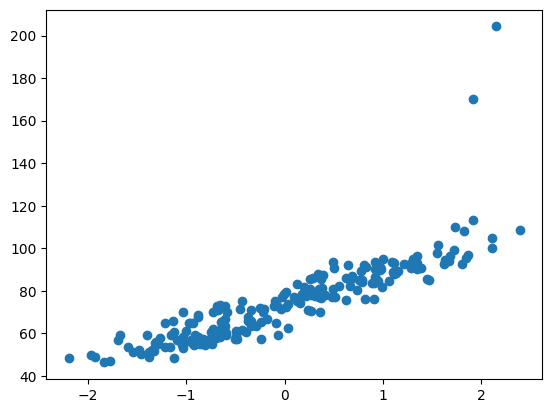

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_[:,1],y)
plt.show()

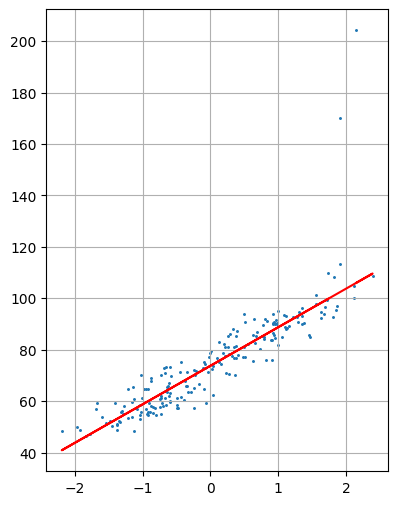

In [ ]:
# plt model
fig = plt.figure()
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( X_[:,1], y, marker='.', s=5)
ax2.grid()

w = np.array(gd_w[len(gd_w)-1])
F = np.dot(X_,w)   # Modelos f(x) = w0 +w1*x
ax2.plot(X_[:,1], F, color='r')
#ax2.plot(X_[:,1], F)                 # Desde los datos
fig.set_size_inches(15, 6)

(a) ¿Se logra un buen ajuste?

El ajuste parece ser aceptable, ya que los coeficientes de la regresión lineal son relativamente cercanos a los valores esperados. Aunque hay una ligera diferencia entre los coeficientes obtenidos con y sin outliers, la diferencia es mínima y la línea de ajuste parece capturar la tendencia general de los datos, lo que sugiere que el modelo es capaz de generalizar adecuadamente.


(b) ¿La función de perdida MSE es robusta ante outliers?

La función de pérdida MSE muestra cierta robustez ante outliers, ya que la diferencia en los valores de los coeficientes obtenidos con y sin outliers es relativamente pequeña. A pesar de la presencia de outliers, el impacto en el MSE es limitado, lo que sugiere que la función de pérdida es capaz de manejar eficazmente los puntos atípicos sin distorsionar significativamente el ajuste del modelo.